In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Lab 1

## Function Code

In [2]:
##This is an unoptimized version that doesnt use matrix arithmetic 
def gradient_descent(
    X: np.array, W: np.array, Y: np.array, lr: float, regularize=False, reg_strength=0
):
    """Single step of gradient descent for Loss L= sum_i from(X_i W -y_i)^2"""
    loss_vals = []
    grads = []
    for i in range(X.shape[0]):
        x = X[i]
        y = Y[i]
        grad = 2 * (x.dot(W) - y) * x
        grads.append(grad)
        loss = np.sum((x.dot(W) - y) ** 2)
        loss_vals.append(loss)
    if regularize:
        grad += reg_strength * W
    W = W - lr * np.sum(grads, axis=0)

    return W, np.sum(loss_vals)

>The summation notation in the HW is misleading, this is just matrix arithmetic. Below we will implement a simpler version of vectorized code

In [ ]:
def mod_gradient_descent(
    X: np.array,
    W: np.array,
    y: np.array,
    lr: float,
    regularize=False,
    reg_strength=0,
    projected_gradient=False,
    hard_threshold=0,
    proximal_gradient=False,
    trimmed_L1=False,
):
    """Vectorized gradient descent

    Args:
        X (np.array): Design matrix
        W (np.array): Weights
        Y (np.array): Target values
        lr (float): Learning rate
        regularize (bool, optional): Regularize the loss. Defaults to False.
        reg_strength (int, optional): Regularization strength. Defaults to 0.
        projected_gradient (bool, optional): Projected gradient descent. Defaults to False.
        projected_gradient_strength (int, optional): Projection strength. Defaults to 0.
        proximal_gradient (bool, optional): Proximal gradient descent. Defaults to False.
        trimmed_L1 (bool, optional): Trimmed L1 regularization. Defaults to False.

    Returns:
        np.array: Updated weights
        float: Loss
    """
    grad = 2 * X.T.dot(X.dot(W) - y)

    if regularize:
        grad+=reg_strength*np.sign(W)
        W=W-lr*grad

    elif trimmed_L1:
        # find the lowest 3 values of the gradient
        lowest_3_idx = np.argsort(np.abs(grad))[:3]
        for idx in lowest_3_idx:
            grad[idx] += reg_strength * np.sign(W[idx])

        W = W - lr * grad
    else:
        W = W - lr * grad
        

    if projected_gradient:
        W[np.argsort(np.abs(W), axis=0)[:-hard_threshold]] = 0

    if proximal_gradient:
        threshold = reg_strength * lr

        for i in range(len(W)):
            if W[i] > threshold:
                W[i] -= threshold
            elif abs(W[i]) <= threshold:
                W[i] = 0
            else:
                W[i] += threshold

    loss = (X.dot(W) - y) ** 2
    return W, np.sum(loss)

In [4]:
def train(
    regularize=False,
    reg_strength=0,
    projected_gradient=False,
    hard_threshold=0,
    proximal_gradient=False,
    plot=True,
    trimmed_L1=False,
):
    """
    This function will execute 200 epochs of training

    Args:
        regularize (bool, optional): Regularize the loss. Defaults to False.
        reg_strength (int, optional): Regularization strength. Defaults to 0.
        projected_gradient (bool, optional): Projected gradient descent. Defaults to False.
        hard_threshold (int, optional): Threshold for projected gradient descent. Defaults to 0.
        proximal_gradient (bool, optional): Proximal gradient descent. Defaults to False.
        plot (bool, optional): Plot the results. Defaults to True.

    Returns:
        list: Epochs
        list: Losses
        list: Weights
        figure: Figure object

    """
    X = np.array(
        [
            [-1.0, 2.0, 1.0, 1.0, -1.0],
            [-2.0, 1.0, -2.0, 0.0, 2.0],
            [1.0, 0.0, -2.0, -2.0, -1.0],
        ]
    )

    y = np.array([5.0, 1.0, 1.0])
    w = np.array([0.0, 0.0, 0.0, 0.0, 0.0])
    losses = []
    epoch = []
    lr = 0.02
    w_values = []
    for i in range(200):
        W, loss = mod_gradient_descent(
            X,
            w,
            y,
            lr,
            regularize,
            reg_strength,
            projected_gradient,
            hard_threshold,
            proximal_gradient,
            trimmed_L1,
        )
        w = W


        losses.append(loss)

        epoch.append(i)
        w_values.append(w)

        # print(f"The loss at epoch {i} is {loss}")
    w_values = np.array(w_values)
    fig = None
    if plot:
        # Create subplots
        fig, axs = plt.subplots(2, 1, figsize=(10, 10))

        # Plot loss vs epoch
        axs[0].plot(epoch, losses)
        axs[0].set_yscale("log")
        axs[0].set_xlabel("Epoch")
        axs[0].set_ylabel("Log Loss")
        axs[0].set_title("Loss vs Epoch")

        # Plot w values vs epoch
        for j in range(w_values.shape[1]):
            axs[1].plot(epoch, w_values[:, j], label=f"w[{j}]")
        axs[1].set_xlabel("Epoch")
        axs[1].set_ylabel("w values")
        axs[1].set_title("w values vs Epoch")
        axs[1].legend()

        plt.tight_layout()

    return epoch, losses, w_values, fig

## (b) Directly minimize L without regularization or constraint.

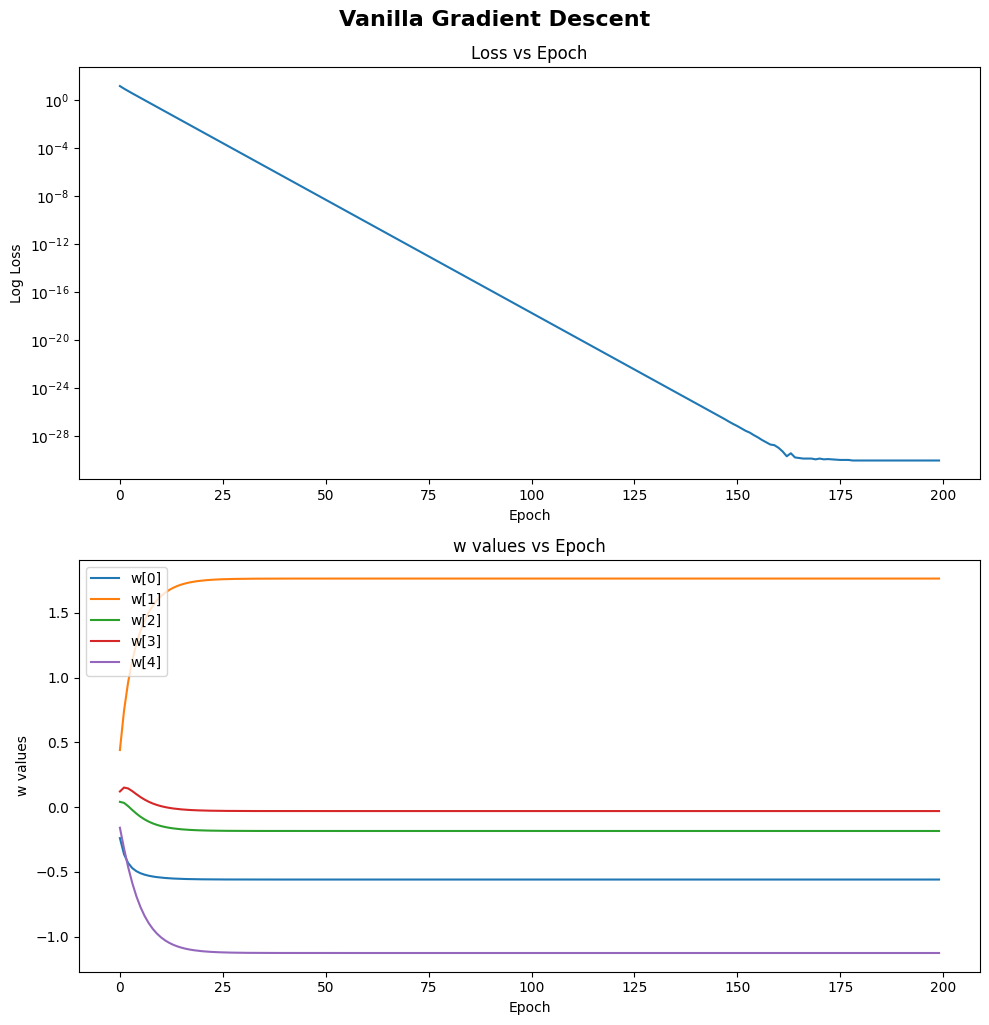

In [5]:
_, _, _, fig = train()
fig.suptitle("Vanilla Gradient Descent", fontsize=16, y=1.02, fontweight="bold")
plt.show()

## (c) Projected gradient descent

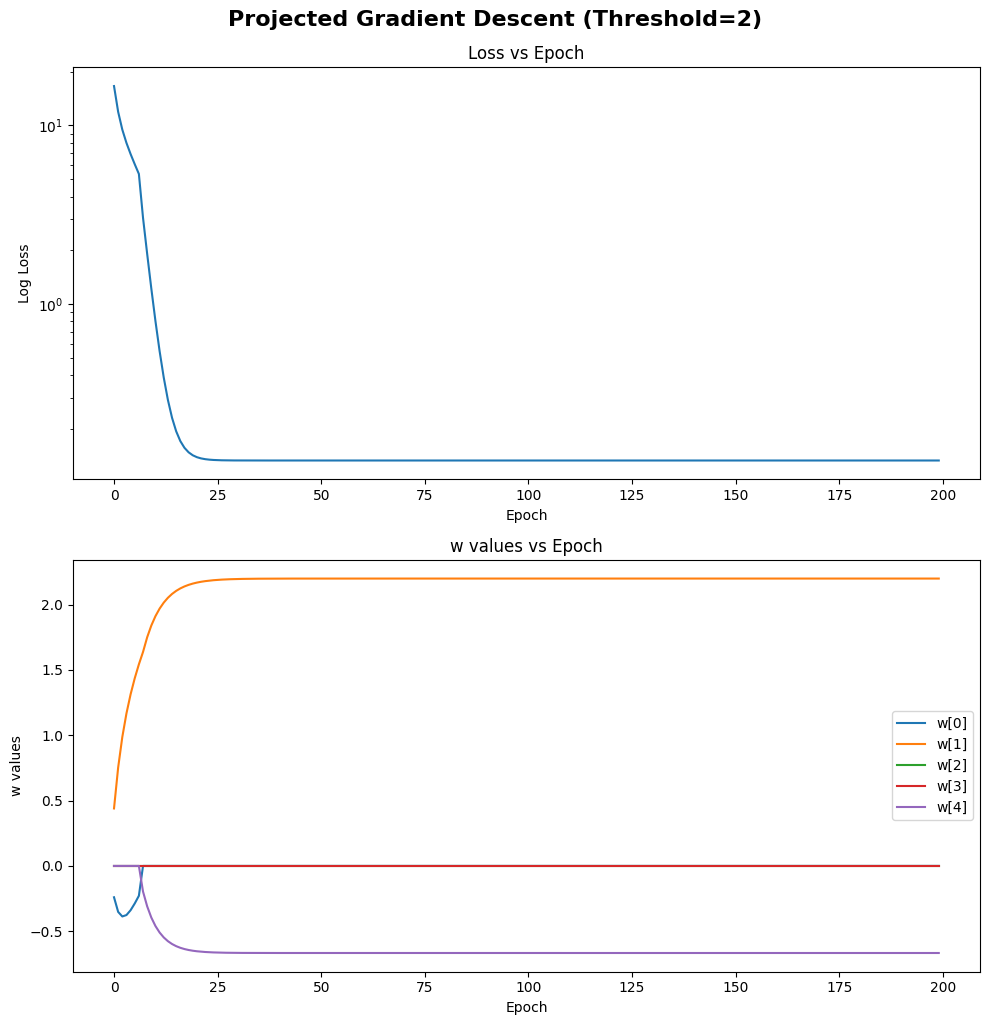

In [6]:
_, _, _, fig = train(projected_gradient=True, hard_threshold=2)
fig.suptitle(
    "Projected Gradient Descent (Threshold=2)", fontsize=16, y=1.02, fontweight="bold"
)
plt.show()

## (d) L1 Regularization

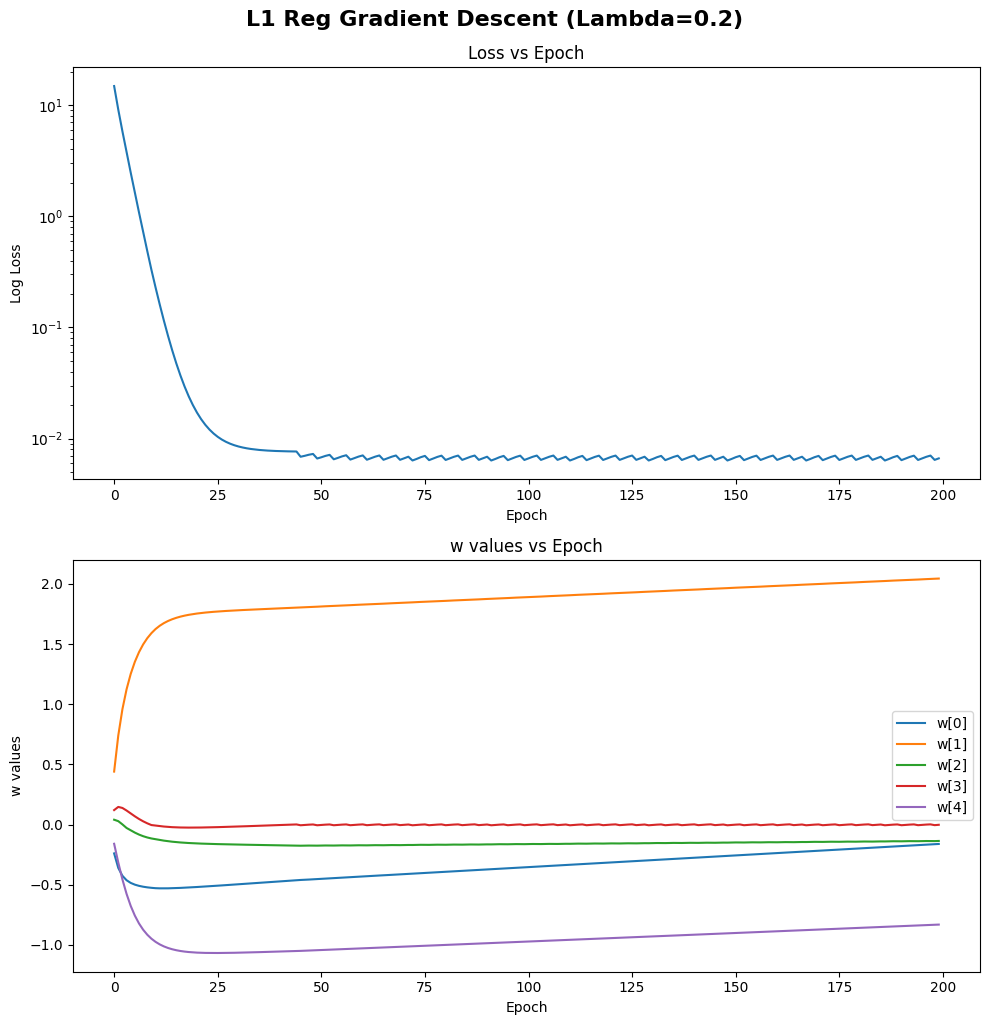

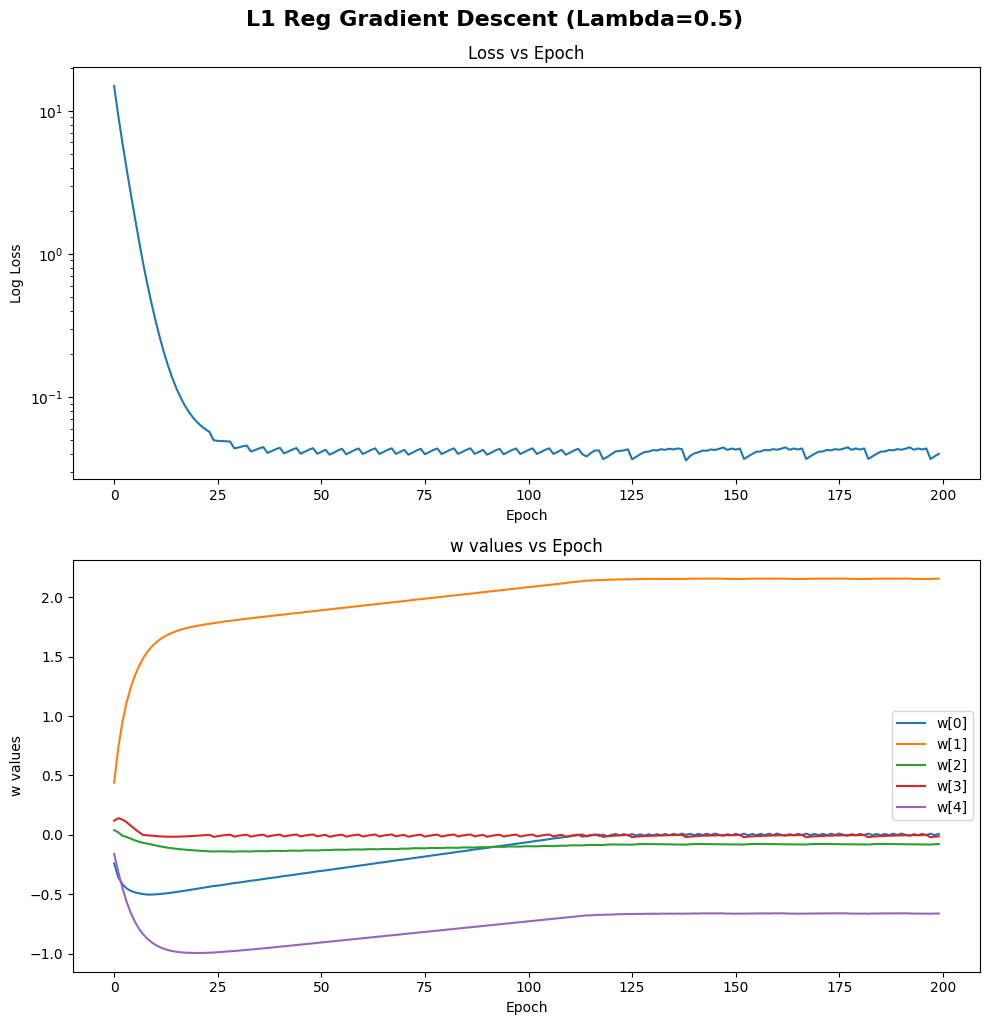

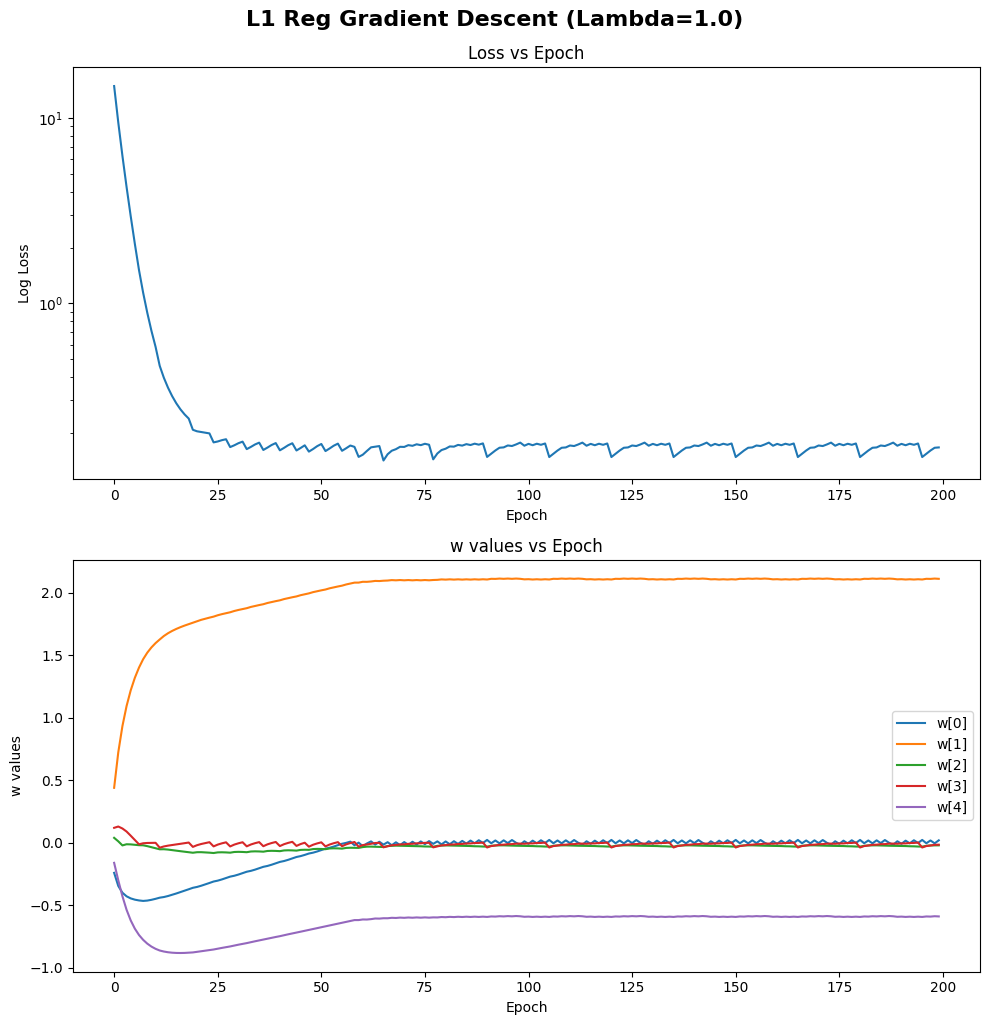

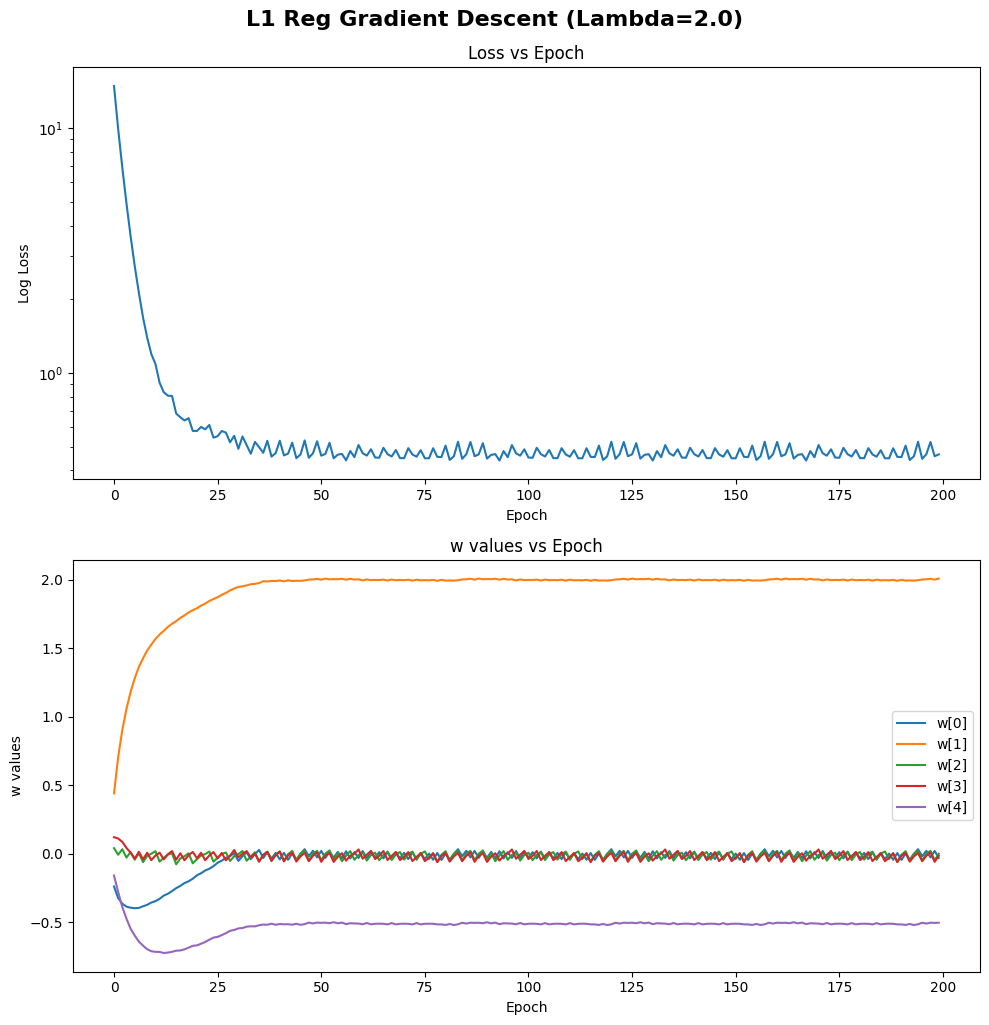

In [7]:
lambda_values = [0.2, 0.5, 1.0, 2.0]
for l in lambda_values:
    _, _, _, fig = train(regularize=True, reg_strength=l)
    fig.suptitle(
        f"L1 Reg Gradient Descent (Lambda={l})",
        fontsize=16,
        y=1.02,
        fontweight="bold",
    )
    plt.show()

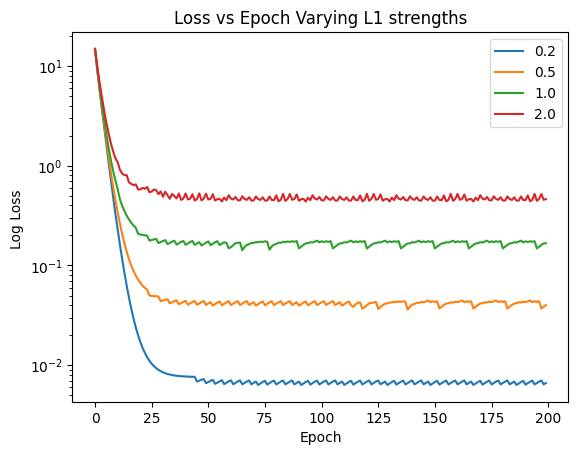

In [8]:
lambda_values = [0.2, 0.5, 1.0, 2.0]
for l in lambda_values:
    epoch, losses, _, _ = train(regularize=True, reg_strength=l, plot=False)
    plt.plot(epoch, losses)
plt.yscale("log")
plt.xlabel("Epoch")
plt.ylabel("Log Loss ")
plt.title("Loss vs Epoch Varying L1 strengths")
plt.legend(lambda_values)
plt.show()

## (e) Proximal Gradient Descent

In [9]:
thresholding_values = [0.004, 0.01, 0.02, 0.04]
mu_value = (
    0.02  # optimizing our l1 reg with lr mu is equivilant to prox with thresh mu*lambda
)
computed_lambdas = [x / 0.02 for x in thresholding_values]
print(computed_lambdas)

[0.2, 0.5, 1.0, 2.0]


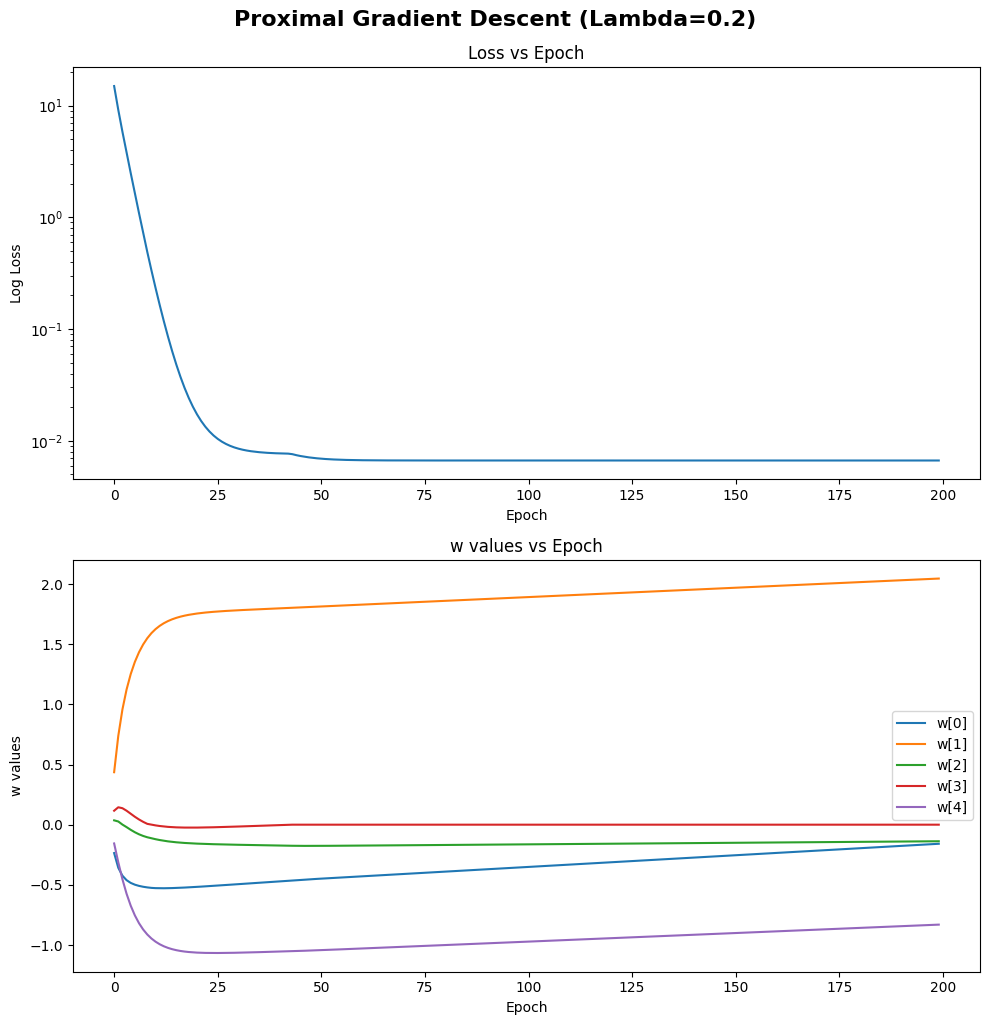

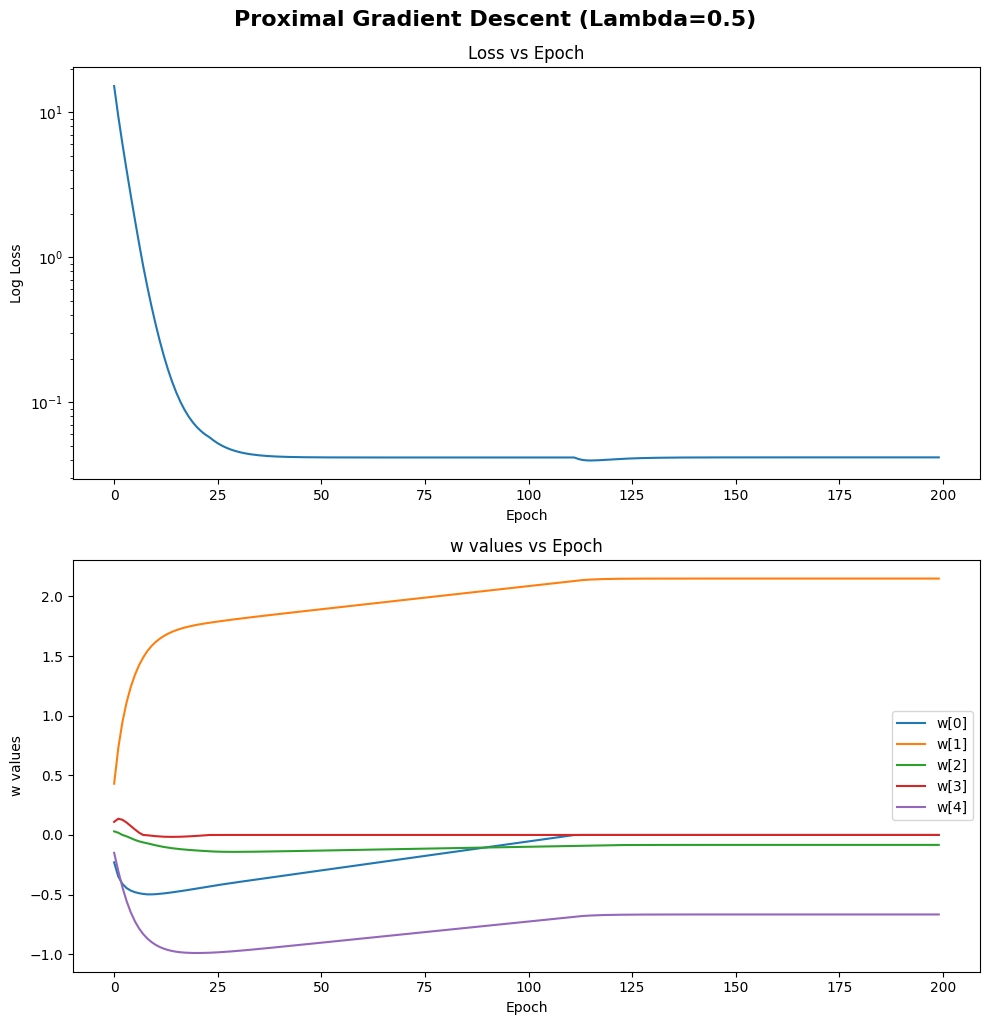

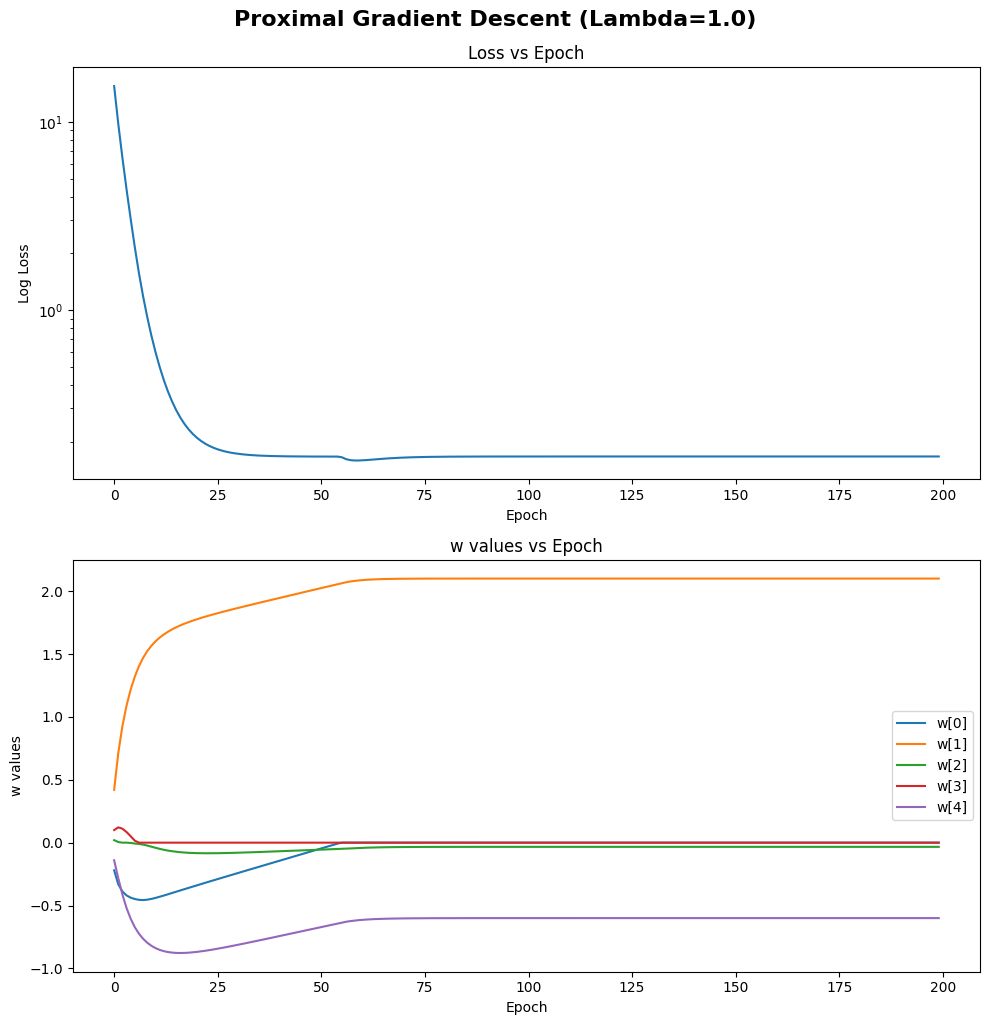

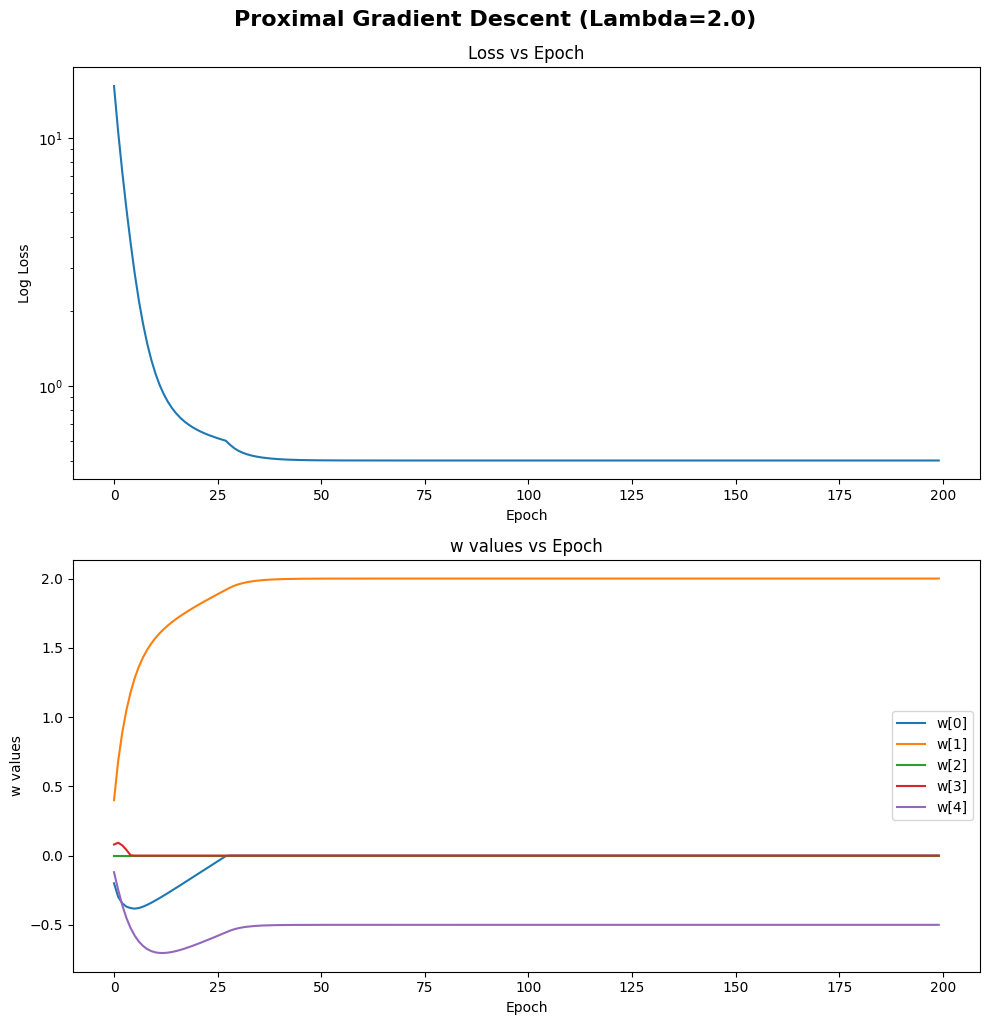

In [10]:
lambda_values = [0.2, 0.5, 1.0, 2.0]
for l in lambda_values:
    _, _, _, fig = train(reg_strength=l, proximal_gradient=True)
    fig.suptitle(
        f"Proximal Gradient Descent (Lambda={l})",
        fontsize=16,
        y=1.02,
        fontweight="bold",
    )
    plt.show()

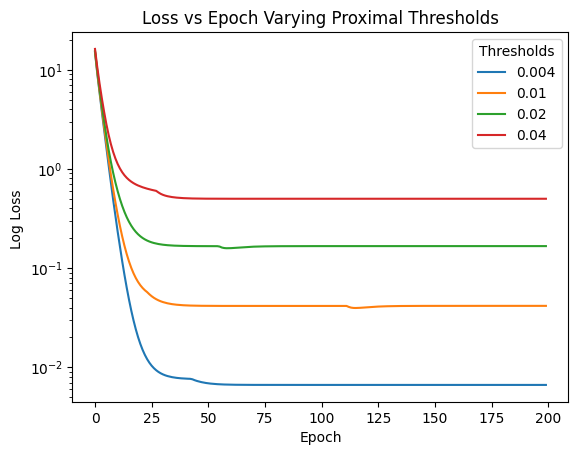

In [11]:
lambda_values = [0.2, 0.5, 1.0, 2.0]
for l in lambda_values:
    epoch, losses, _, _ = train(reg_strength=l, plot=False, proximal_gradient=True)
    plt.plot(epoch, losses)
plt.yscale("log")
plt.xlabel("Epoch")
plt.ylabel("Log Loss ")
plt.title("Loss vs Epoch Varying Proximal Thresholds")
plt.legend(thresholding_values, title="Thresholds")
plt.show()

## (f) Trimmed L1 with Proximal gradient update

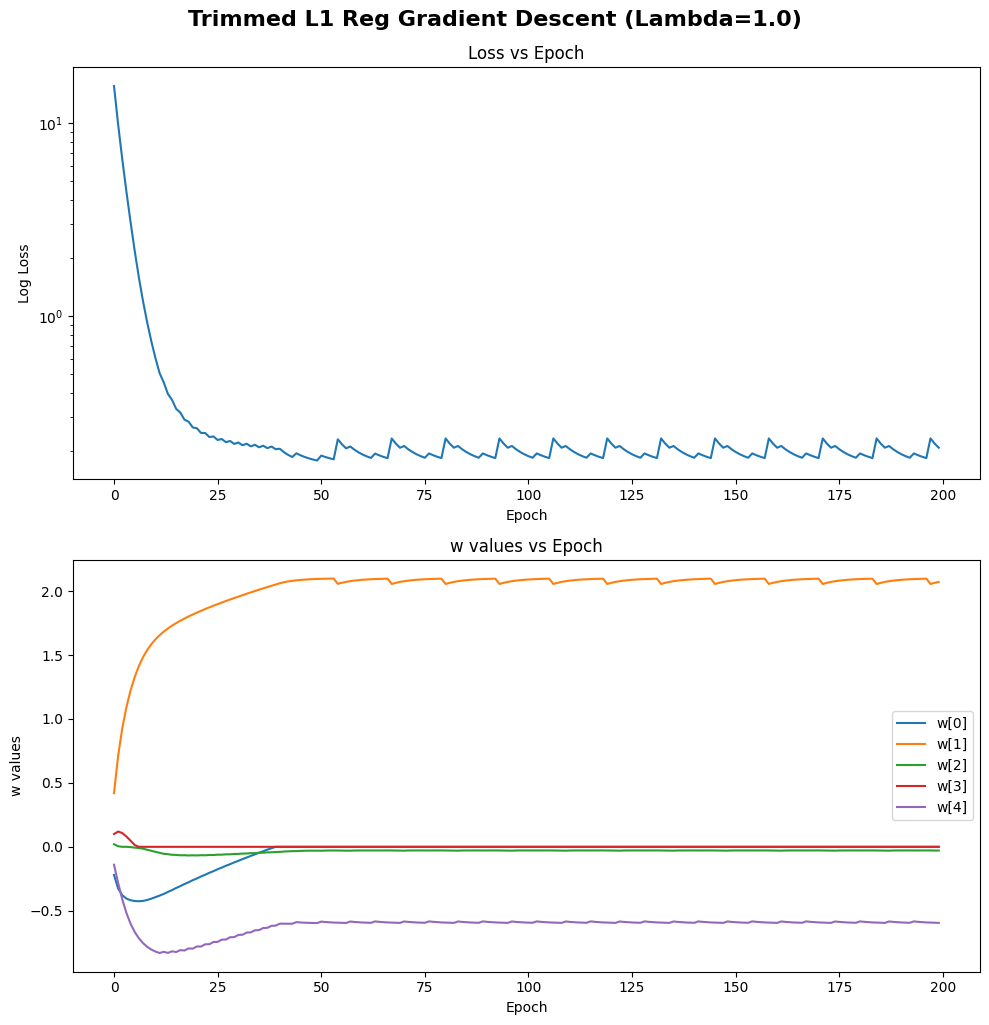

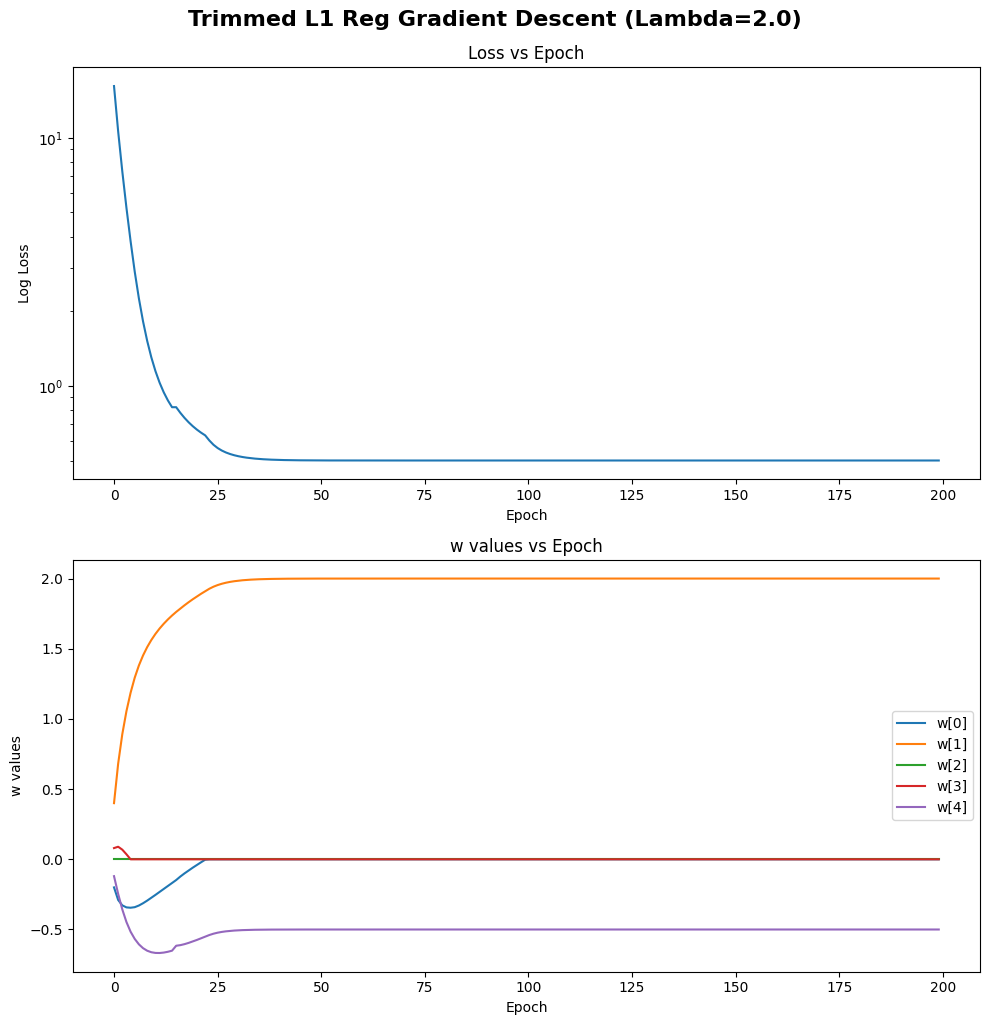

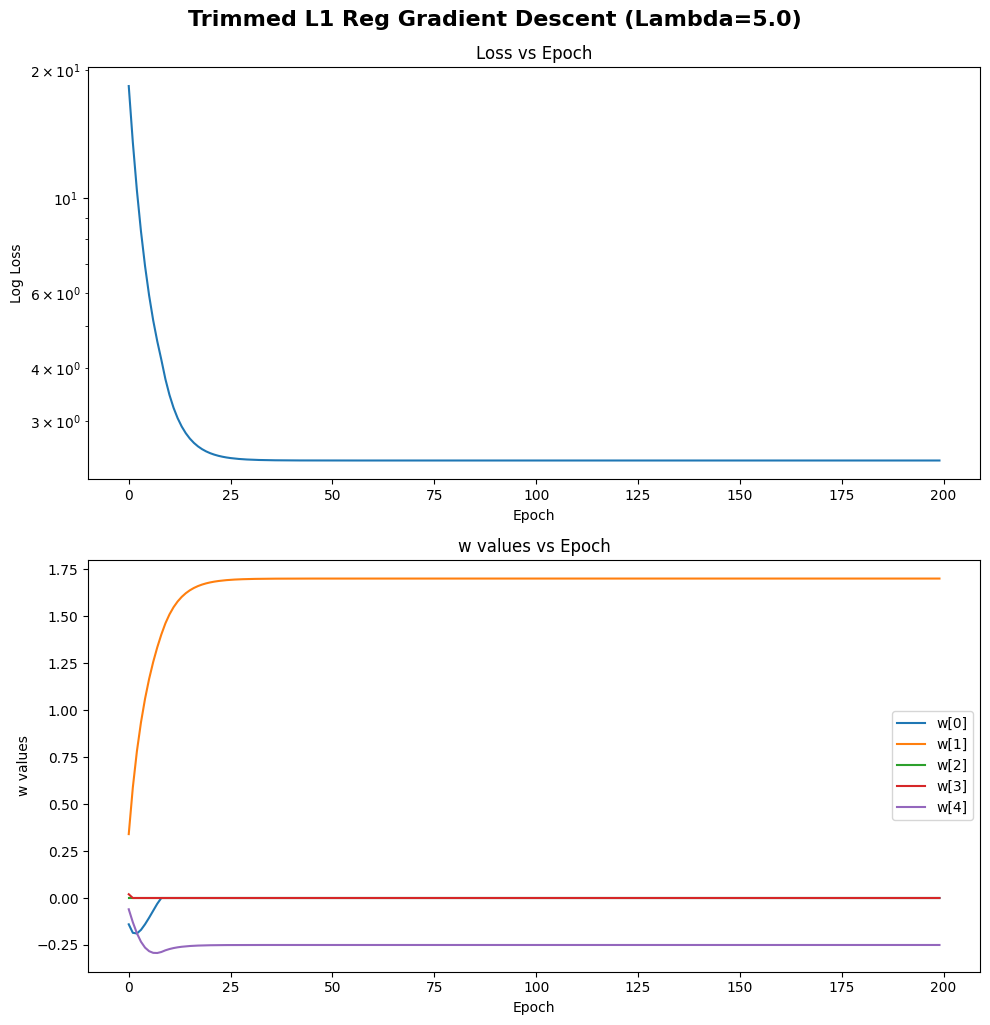

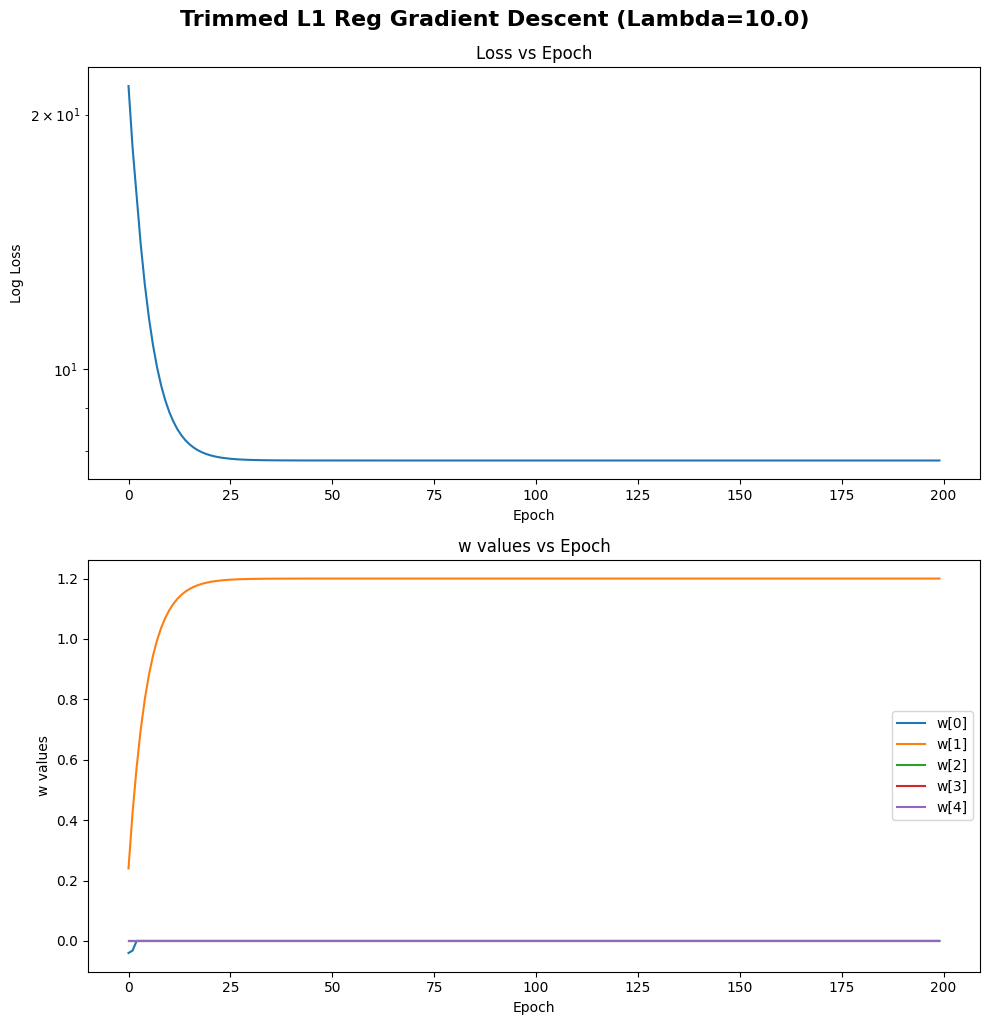

In [12]:
lambda_values = [1.0, 2.0, 5.0, 10.0]
for l in lambda_values:
    _, _, _, fig = train(reg_strength=l, trimmed_L1=True, proximal_gradient=True)
    fig.suptitle(
        f"Trimmed L1 Reg Gradient Descent (Lambda={l})",
        fontsize=16,
        y=1.02,
        fontweight="bold",
    )
    plt.show()

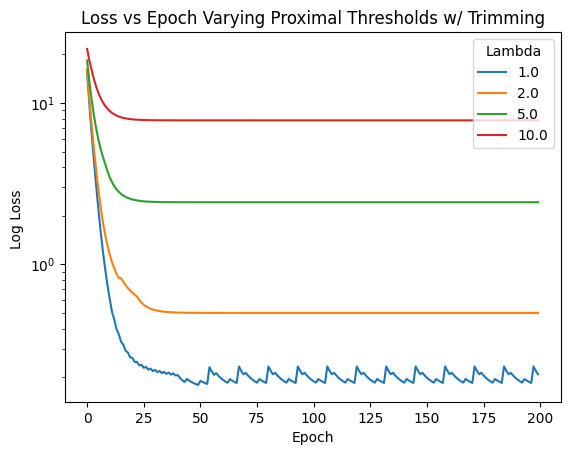

In [13]:
lambda_values = [1.0, 2.0, 5.0, 10.0]
soft_thresholds = [0.02, 0.04, 0.1, 0.2]
for l in lambda_values:
    epoch, losses, _, _ = train(
        reg_strength=l, plot=False, proximal_gradient=True, trimmed_L1=True
    )
    plt.plot(epoch, losses)
plt.yscale("log")
plt.xlabel("Epoch")
plt.ylabel("Log Loss ")
plt.title("Loss vs Epoch Varying Proximal Thresholds w/ Trimming")
plt.legend(lambda_values, loc="upper right", title="Lambda")
plt.show()